In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [6]:
wine_df_columns = [ 'class', 'Alcohol', 'Malicity', 'Ash', 'Alcanity', 'Magnesium', 'TotalPhenol', 'Flavanoids', 
                  'NonFlavanoids', 'Prothocyanins', 'ColorIntensity', 'Hue', 'fracdiluted', 'Proline' ]

In [11]:
wine_df = pd.read_csv("wine.csv", names=wine_df_columns)

In [12]:
wine_df.head()

,class,Alcohol,Malicity,Ash,Alcanity,Magnesium,TotalPhenol,Flavanoids,NonFlavanoids,Prothocyanins,ColorIntensity,Hue,fracdiluted,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
# Split the wine data into separate training (70%) and test (30%) sets and then standardize it to unit variance:



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X,y = wine_df.iloc[:, 1:].values , wine_df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)


In [14]:
#Now we want to construct the covariance matrix which is symmetric with d×d-dimension, where d is the dataset dimension. The covariance matrix stores the pairwise covariances between the different features.

covariant_matrix= np.cov(X_train_std.T)

In [15]:
# Display covariant matrix . This is a 13 X 13 square matrix

covariant_matrix

array([[ 1.00813008,  0.08797701,  0.23066952, -0.32868099,  0.2141631 ,
         0.35576761,  0.2991246 , -0.16913744,  0.09649074,  0.56962271,
        -0.04781543,  0.07403492,  0.63277882],
       [ 0.08797701,  1.00813008,  0.2016416 ,  0.30658143, -0.06030917,
        -0.30124242, -0.41221162,  0.36616593, -0.19190146,  0.30749173,
        -0.54992807, -0.39352761, -0.20253906],
       [ 0.23066952,  0.2016416 ,  1.00813008,  0.44971971,  0.18321413,
         0.12235533,  0.06130256,  0.18655693, -0.02607834,  0.24555355,
        -0.10928021, -0.01820002,  0.15948032],
       [-0.32868099,  0.30658143,  0.44971971,  1.00813008, -0.08930998,
        -0.37018442, -0.41804463,  0.40212108, -0.25765667, -0.03090225,
        -0.25313262, -0.28934372, -0.48504311],
       [ 0.2141631 , -0.06030917,  0.18321413, -0.08930998,  1.00813008,
         0.16513295,  0.14458703, -0.30763563,  0.27228619,  0.1260674 ,
         0.05792599,  0.01596134,  0.31461066],
       [ 0.35576761, -0.301242

In [16]:
#The eigenvectors of the covariance matrix represent the principal components, while the corresponding eigenvalues 
# define their magnitude.

# In the case of the Wine dataset, we obtain 13 eigenvectors and eigenvalues from the 13×13 covariance matrix.

# An eigenvector ν satisfies the following condition where lambda is the eigenvalue: # Aν = λν 
 
# We use the linalg.eig function from NumPy to obtain the eigenpairs of the Wine covariance matrix:


eigen_values , eigen_vectors = np.linalg.eig(covariant_matrix)

In [17]:
eigen_values, eigen_vectors

(array([4.8923083 , 2.46635032, 1.42809973, 1.01233462, 0.84906459,
        0.60181514, 0.52251546, 0.08414846, 0.33051429, 0.29595018,
        0.16831254, 0.21432212, 0.2399553 ]),
 array([[ 1.46698114e-01,  5.04170789e-01, -1.17235150e-01,
          2.06254611e-01, -1.87815947e-01, -1.48851318e-01,
         -1.79263662e-01, -5.54687162e-02, -4.03054922e-01,
         -4.17197583e-01,  2.75660860e-01,  4.03567189e-01,
          4.13320786e-04],
        [-2.42245536e-01,  2.42168894e-01,  1.49946576e-01,
          1.30489298e-01,  5.68639776e-01, -2.69052764e-01,
         -5.92636731e-01,  3.32731614e-02, -1.01833706e-01,
          2.17101488e-01, -8.13845005e-02, -1.52474999e-01,
         -8.78560762e-02],
        [-2.99344215e-02,  2.86984836e-01,  6.56394387e-01,
          1.51536318e-02, -2.99209426e-01, -9.33386061e-02,
          6.07334578e-02, -1.00618575e-01,  3.51841423e-01,
          1.28549846e-01, -1.29751275e-02,  1.68376064e-01,
         -4.52518598e-01],
        [-2.55190

In [18]:
# We computed the covariance matrix of the standardized training dataset using the numpy.cov() function.

# Using the linalg.eig function, we performed the eigendecomposition that yielded 13 eigenvalues and the 
# corresponding eigenvectors stored as columns in a 13×13 matrix.

# Since we want to reduce the dimensionality of our dataset by compressing it onto a new feature subspace, 
# we only select the subset of the eigenvectors (principal components) that contains most of the information(variance).

# Since the eigenvalues define the magnitude of the eigenvectors, we have to sort the eigenvalues by decreasing
# magnitude, and we are interested in the top k eigenvectors based on the values of their corresponding eigenvalues.

# But before we collect those k most informative eigenvectors, let's plot the variance explained ratios of 
# the eigenvalues. The variance explained ratio of an eigenvalue λj is simply the fraction of an eigenvalue
# λj and the total sum of the eigenvalues:
#  λj / ∑j  (tot is ∑j)




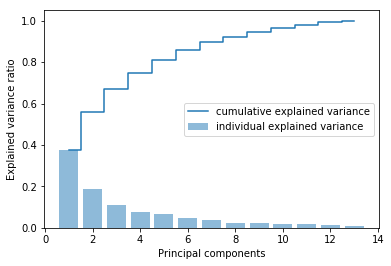

In [19]:
tot = sum(eigen_values)
var_explained = [(i / tot) for i in sorted(eigen_values, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 13 entries as there are 13 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 13 entries with 13 th entry 
# cumulative reaching almost 100%


plt.bar(range(1,14), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()


# The plot shows that the first principal component alone accounts for 40 percent of the variance. 
# Also, we can see that the first two principal components combined explain almost 60 percent of the variance 
# in the data.

In [20]:
# We're going to sort the eigen-pairs by descending order of the eigenvalues, and construct a projection matrix
# from the selected eigenvectors. Then, using the projection matrix we will transform the data onto the 
#lower-dimensional subspace.

# Let's start by sorting the eigen-pairs by decreasing order of the eigenvalues:

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:5]

[(4.892308303273744,
  array([ 0.14669811, -0.24224554, -0.02993442, -0.25519002,  0.12079772,
          0.38934455,  0.42326486, -0.30634956,  0.30572219, -0.09869191,
          0.30032535,  0.36821154,  0.29259713])),
 (2.466350315759231,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048446,
  array([-0.11723515,  0.14994658,  0.65639439,  0.58428234,  0.08226275,
          0.18080442,  0.14295933,  0.17223475,  0.1583621 , -0.14242171,
          0.09323872,  0.19607741, -0.09731711])),
 (1.0123346209044954,
  array([ 0.20625461,  0.1304893 ,  0.01515363, -0.09042209, -0.83912835,
          0.19317948,  0.14045955,  0.33733262, -0.1147529 ,  0.07878571,
          0.02417403,  0.18402864,  0.05676778])),
 (0.8490645933450256,
  array([-0.18781595,  0.56863978, -0.29920943, -0.04124995, -0.02719713,
          0.14064543, 

In [21]:
# here we are creating from the eigen-pair table, a 2 dim array of only vectors (each column is one vector)
# we are taking only the first two eigen vectors (which cover 60% of variance) for demo purpose

# Note that choosing the number of principal components has to be determined from a trade-off between computational 
# efficiency and the performance of the classifier, however, we only chose two eigenvectors for the demonstration 
# purpose.

# We use hstack (horizontally stack 0th row 1st column, 1st row 1st column). The newaxis() function of np
# coverts a row vector to a column vector and stacks those vectors horizontally
#Now we've created a 13 × 2 projection matrix W from the top two eigenvectors.





w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

In [22]:
w

array([[ 0.14669811,  0.50417079],
       [-0.24224554,  0.24216889],
       [-0.02993442,  0.28698484],
       [-0.25519002, -0.06468718],
       [ 0.12079772,  0.22995385],
       [ 0.38934455,  0.09363991],
       [ 0.42326486,  0.01088622],
       [-0.30634956,  0.01870216],
       [ 0.30572219,  0.03040352],
       [-0.09869191,  0.54527081],
       [ 0.30032535, -0.27924322],
       [ 0.36821154, -0.174365  ],
       [ 0.29259713,  0.36315461]])

In [23]:
X_train_std[0]

array([ 0.91083058, -0.46259897, -0.01142613, -0.82067872,  0.06241693,
        0.58820446,  0.93565436, -0.7619138 ,  0.13007174, -0.51238741,
        0.65706596,  1.94354495,  0.93700997])

In [24]:
# we want to transform the Wine dataset (X_traini_std) onto the new principal component axes
# Transform dataset onto a new principal axes using matrix multiplication (shown as dot operation)

X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [25]:
# complete matrix operation 

X_train_pca = X_train_std.dot(w)
X_train_std.shape, w.shape, X_train_pca.shape

((124, 13), (13, 2), (124, 2))

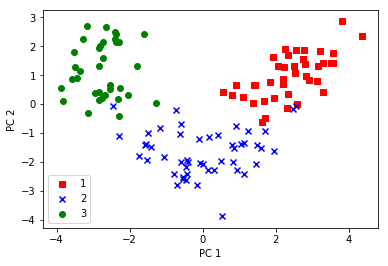

In [26]:
# For the scatter plot, we take data points from X_train_pca PC1 and PC2 for all those cases where y_train lable is L 
# where L  can vary from 1,2,3.
# For each L, a corresponding color and marker is used in the plot

colors = ['r' , 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train ==l , 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.show()